# Table of Contents

#### Histogram
- order_hour_of_day

#### Bar Graph
- loyalty_flag

#### Line Plot Sample
- order_hour_of_day X prices

#### Line Plot Sample
- age X num_depend

#### Scatterplot
- age X income

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# setting master path
path = r'/Users/Norberto/Desktop/2023-10 Instacart Basket Analysis'

In [2]:
# read pkl files
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

### Step 3
You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
- In a markdown cell beneath your histogram, describe what the histogram demonstrates.

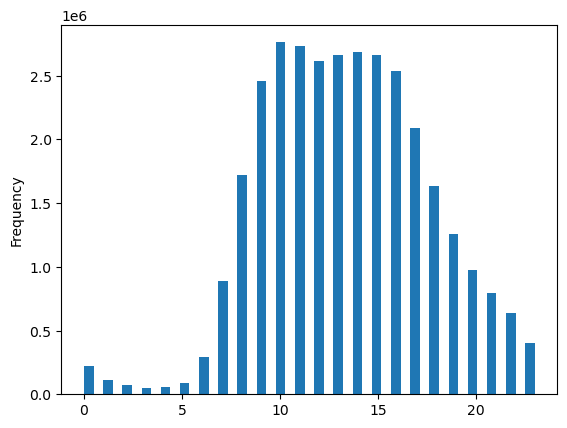

In [8]:
hist = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 47)

The histogram demonstraights that the least popular hours for ordering on the instacart app is from midnight until 6am. At 7am orders start to pick up with most orders happening from 10am til 4pm. The app becomes less popular from 4pm til midnight, but still moreso than the overnight hours.

In [9]:
# save visualization to correct folder
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_HOD.png'))

### Step 4
The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.


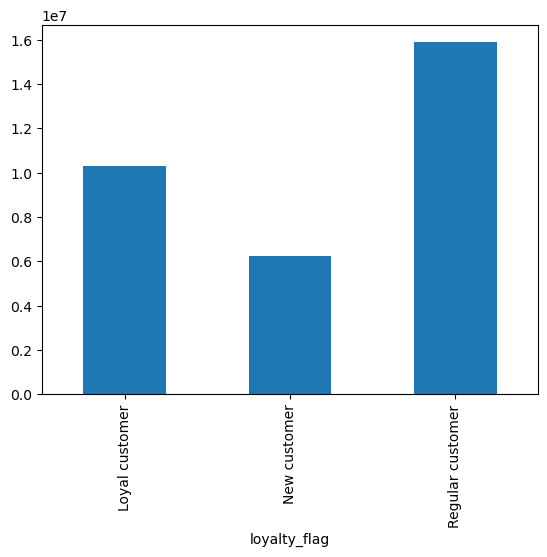

In [10]:
# create bar chart and assign to variable
bar = ords_prods_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

In [11]:
# save visualization to correct folder
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

### Step 5
Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [12]:
# establish 'seed' to make random sample reproducible
np.random.seed(4)

# create random value for each row in df and assign True or False based on the comparison to 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

# two df. one big with rows greater than .7 and one with rows less than .7
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [13]:
# create df with only relevant columns to reduce computing
sample_small = small[['order_hour_of_day','prices']]

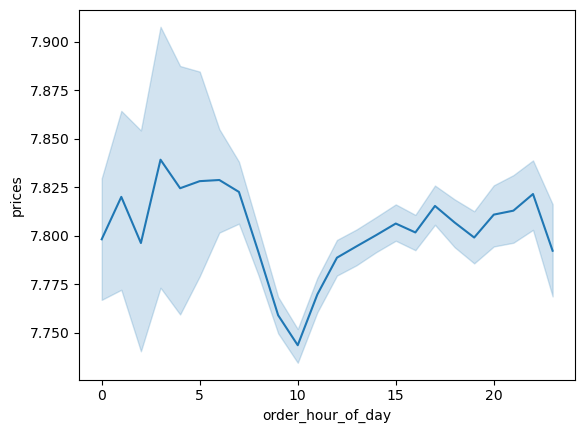

In [16]:
# make and assign line plot from small sample
line = sns.lineplot(data = sample_small, x = 'order_hour_of_day',y = 'prices')

The line graph above indicates that the greatest variation in price occurs during the early hours of the day, which makes sense because we also saw that part of the day had the least amount of purchases. It would be less accurate to estimate the price of those goods compared to those from the middle of the day onward where the average price is lower. The lower prices is later hours are reported with a lot more confidence.

In [17]:
# Save visualization in correct folder
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_HOD.png'))

### Step 6
Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
- In a markdown cell beneath your line chart, describe what the line chart shows.


In [24]:
# create df with only relevant columns to reduce computing
sample_small = small[['num_depend','age']]

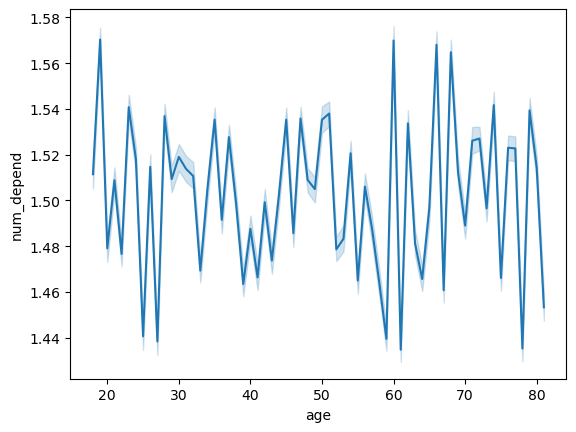

In [25]:
# make and assign line plot from small sample
line_2 = sns.lineplot(data = sample_small, x = 'age',y = 'num_depend')

Number of dependants does not correlate with age. This means that the number of dependents a person has does not correspond to their age; a young customer can have no, or many dependents.

In [26]:
# Save visualization in correct folder
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_depend.png'))

### Step 7
You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [ ]:
# create df with only relevant columns to reduce computing
sample_small = small[['age','income']]

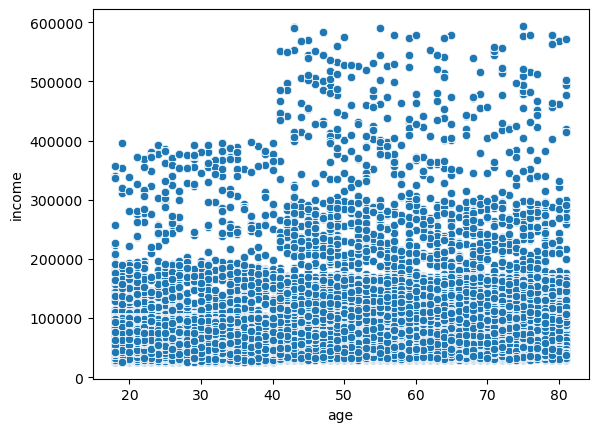

In [22]:
# show scatterplot to see outliers in prices column
scatter = sns.scatterplot(x = 'age', y = 'income',data = sample_small)

The scatterplot shows that income based off age matters mostly at the age of 40 when the income of instacart customers break into the higher end of the income ranges of all customers. 

In [23]:
# Save visualization in correct folder
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))